In [4]:
import numpy as np
import sys
sys.path.insert(0, '../src/')
from AMC_Density_Evolution import *
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
from matplotlib import ticker

from matplotlib import rc
rc('text', usetex=True)
mpl.rcParams['axes.formatter.use_mathtext']=True
mpl.rcParams['figure.dpi']=90
wid=1.3
mpl.rcParams['axes.linewidth'] = wid #set the value globally
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Times']

mpl.rcParams['font.weight'] = 2.0

In [5]:
def PopulationPlots_Seperate(files, labelL, flab, tlab, nfw=True, sve=False):
    fs=16
    fig, ax = plt.subplots(4, sharex=True, figsize=(7,12), gridspec_kw={'hspace': 0.04}) 
    color_list = ['#143642', '#0F8B8D', '#976391', '#A8201A', '#EC9A29', 'tab:purple','tab:blue', 'tab:olive', 'tab:brown']
    
    binsL = np.logspace(-16, -9, 200)
    for i in range(len(files)):
        fileLoad = np.loadtxt('../src/GBT_Proposal/'+files[i])
        if len(fileLoad) > 0:
            if nfw: 
                weights = np.ones(len(fileLoad)) / 5e3
            else:
                weights = np.ones(len(fileLoad)) / 1e3
            ax[i].hist(fileLoad, bins=binsL, weights=weights, cumulative=True, log=True, histtype='step', color=color_list[i], linewidth=1.2)
        else:
            pass
        
        ax[i].tick_params(direction='in', length=8, width=1, labelsize=16)#, colors='r',grid_color='r', grid_alpha=0.5)
        ax[i].tick_params(which='minor', direction='in', length=6, width=1, labelsize=12) 
        ax[i].tick_params(axis='y',which='major', length = 10, labelsize = 16, pad=3)
        ax[i].tick_params(axis='y',which='minor', length = 5, labelsize = 16)
        ax[i].tick_params(axis='x',which='major', length = 10, labelsize = 16, pad=5.5)
        ax[i].tick_params(axis='x',which='minor', length = 5, labelsize = 16)
        
        ax[i].set_xlim([binsL[0], binsL[-1]]);
        
        ax[i].set_yscale('log') 
        ax[i].set_xscale('log')
        
        # if i == len(files):
        ax[i].set_xlabel(r"$g_{lim}$", fontsize=19)
        if i == 2:
            ax[i].set_ylabel(r"$f_{obs}(g < g_{lim})$", fontsize=fs)
        
        ax[i].xaxis.set_tick_params(width=wid)
        ax[i].xaxis.set_tick_params(which='minor',width=wid)
        ax[i].yaxis.set_tick_params(width=wid)
        ax[i].yaxis.set_tick_params(which='minor',width=wid)
        
        if nfw:
            ax[i].set_ylim([5e-5, 1e-2]);
            ax[i].axhline(y=0.00116, color='k', ls='-.', lw=1)
            if i == 0:
                ax[i].text(1e-14, 0.00116*1.4, r'1 event / 100 hours', ha='left', fontsize=13);
        else:
            ax[i].set_ylim([5e-5, 5e-1]);
            ax[i].axhline(y=0.073529, color='k', ls='-.', lw=1)
            if i == 0:
                ax[i].text(1e-14, 0.073529*1.4, r'1 event / 100 hours', ha='left', fontsize=13);
            
        #ax[i].set_ylim([ymin, 7e-2]);
        ax[i].text(1.5e-16, 5e-3, labelL[i], ha='left', fontsize=13);
    

        #ax[i].set_xticks(tickL_maj, minor=False)
        #ax[i].set_xticklabels(tickL)
        #ax[i].set_xticks(tickL_min, minor=True)
        #ax[i].set_yticks(tickL_majY, minor=False)
        #ax[i].set_yticklabels(tickLY)
        #ax[i].set_yticks(tickL_minY, minor=True)
        #ax[i].set_yticklabels(len(tickL_minY) * [''], minor=True)
        
        
        
            
        if i == len(files)-1:
            if nfw:
                strgL =  'NFW, $\Delta f$ = ' + flab + ', t = ' + tlab
            else:
                strgL =  'PL, $\Delta f$ = ' + flab + ', t = ' + tlab
            ax[i].text(1.5e-16, 2e-3, strgL, ha='left', fontsize=13);
#        if sve:
#            fig.savefig("/Users/samuelwitte/Desktop/Magnetized_Plasma/neutron-star-ray-tracing/PopulationPlots/LineWidth_Freq_Stack.png", dpi=200)
    return

def PopulationPlots_Join(files, labelL, ftag, nfw=True, sve=False):
    fs=16
    fig, ax = plt.subplots(1, figsize=(7,5)) 
    if nfw:
        binsL = np.logspace(-16, -9, 200)
    else:
        binsL = np.logspace(-19, -9, 200)
    color_list = ['#143642', '#0F8B8D', '#976391', '#A8201A', '#EC9A29', 'tab:purple','tab:blue', 'tab:olive', 'tab:brown']
    ax.tick_params(direction='in', length=8, width=1, labelsize=16)#, colors='r',grid_color='r', grid_alpha=0.5)
    ax.tick_params(which='minor', direction='in', length=6, width=1, labelsize=12) 
    ax.tick_params(axis='y',which='major', length = 10, labelsize = 16, pad=3)
    ax.tick_params(axis='y',which='minor', length = 5, labelsize = 16)
    ax.tick_params(axis='x',which='major', length = 10, labelsize = 16, pad=5.5)
    ax.tick_params(axis='x',which='minor', length = 5, labelsize = 16)
    ax.set_xlim([binsL[0], binsL[-1]]);
    ax.set_yscale('log') 
    ax.set_xscale('log')
    ax.set_xlabel(r"$g_{max} \hspace{.4cm} [{\rm GeV}^{-1}]$", fontsize=19)
    ax.set_ylabel(r"$f_{obs}(g < g_{max})$", fontsize=fs)
    ax.xaxis.set_tick_params(width=wid)
    ax.xaxis.set_tick_params(which='minor',width=wid)
    ax.yaxis.set_tick_params(width=wid)
    ax.yaxis.set_tick_params(which='minor',width=wid)
    

    if nfw:
        shiftY = .15
        ymax = 1e-2
        ax.set_ylim([5e-5, ymax]);
        ax.axhline(y=0.00116, color='k', ls='-.', lw=1)
        # ax.axvline(x=7e-11, color='k', ls='--', lw=1)
        ax.axvspan(7e-11, 1e-8, alpha=0.2, color='#4E937A')
        
        ax.text(5e-15, 0.00116*1.1, r'1 evnt / 100 obs. hrs.', ha='left', fontsize=13);
        ax.text(8e-11, 3e-3, r'CAST', c='#4E937A', ha='left', fontsize=13, rotation=-90);
        ax.text(1.7e-16, 5e-4, r'NFW', ha='left', fontsize=13);
        ax.text(1.7e-16, 5e-4/10**shiftY, r'$t_{bin}$ = 4 hours', ha='left', fontsize=13);
        ax.text(1.7e-16, 5e-4/10**(2*shiftY), r'$\Delta f / m_a = 5 \times 10^{-6}$', ha='left', fontsize=13);
    else:
        shiftY = .2
        ymax = 1
        ax.set_ylim([5e-4, ymax]);
        
        #ax.axvline(x=7e-11, color='k', ls='--', lw=1)
        ax.axvspan(7e-11, 1e-8, alpha=0.2, color='#4E937A')
        ev_rate = 294.78 / 24 * 4
        fr_rate = 1 / ev_rate 
        # ax.axhline(y=fr_rate, color='k', ls='-.', lw=1)
        ax.text(8e-11, 3e-3, r'CAST',  c='#4E937A', ha='left', fontsize=13, rotation=-90);    
        # ax.text(5e-15, fr_rate*1.1, r'1 evnt / 4 hrs.', ha='left', fontsize=13);
        ax.text(2e-19, 1e-1, r'PL [Avg.]', ha='left', fontsize=13);
        ax.text(2e-19, 1e-1/10**shiftY, r'$t_{bin}$ = 4 hours', ha='left', fontsize=13);
        ax.text(2e-19, 1e-1/10**(2*shiftY), r'$\Delta f / m_a = 5 \times 10^{-6}$', ha='left', fontsize=13);
        ax.text(2e-19, 1e-1/10**(3*shiftY), r'$m_a = 19 \mu$eV', ha='left', fontsize=13);
    
    
    for i in range(len(files)):
        fileLoad = np.loadtxt('../src/GBT_Proposal/'+files[i])
        if len(fileLoad) > 0:
            if nfw:
                weights = np.ones(len(fileLoad)) / 1e3
            else:
                weights = np.ones(len(fileLoad)) / 1e3
            ax.hist(fileLoad, bins=binsL, weights=weights, cumulative=True, log=True, histtype='step', color=color_list[i], linewidth=1.2)
            if nfw:
                ax.text(1.7e-16, ymax / 10**(shiftY*(i+1)), labelL[i], ha='left', fontsize=13, color=color_list[i]);
            else:
                ax.text(2e-19, ymax / 1.4 / 10**(shiftY*(i+1)), labelL[i], ha='left', fontsize=13, color=color_list[i]);
        else:
            pass
        if sve:
            fig.savefig("/Users/samuelwitte/Desktop/Magnetized_Plasma/Axion_Infall/plots/FObs_Plot"+ftag+".png", dpi=200)
    return



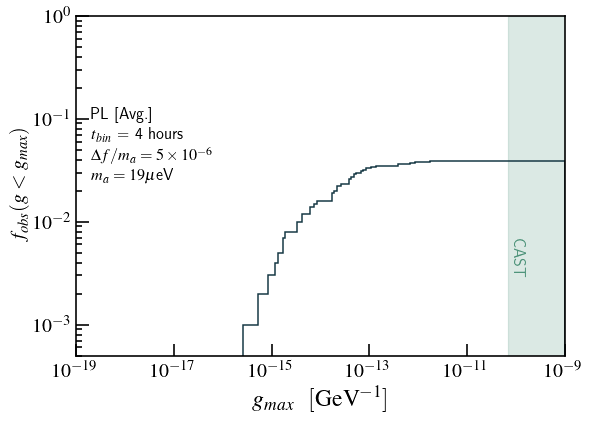

In [7]:
file1= "glim__GBT__PL_AxionMass_4.16e-05_Bwdith_9.50e-06_Tbin_0.417_days__Andro_.dat"
#file2= "glim__GBT__PL_AxionMass_1.90e-05_Bwdith_5.00e-06_Tbin_0.167_days__NoFoV_.dat"
files = [file1]
labelL = [""]
ftag = ""
PopulationPlots_Join(files, labelL, ftag, sve=False, nfw=False)